In [1]:
import pandas as pd

# Load your uploaded dataset
df = pd.read_csv('/content/drive/MyDrive/aviation-accident.csv')

# Show first few rows and info
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23917 entries, 0 to 23916
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23917 non-null  object
 1   type          23917 non-null  object
 2   registration  22365 non-null  object
 3   operator      23913 non-null  object
 4   fatalities    19935 non-null  object
 5   location      22959 non-null  object
 6   country       23917 non-null  object
 7   cat           23917 non-null  object
 8   year          23917 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


(        date             type registration       operator fatalities  \
 0  date unk.   Antonov An-12B       T-1206  Indonesian AF        NaN   
 1  date unk.   Antonov An-12B       T-1204  Indonesian AF        NaN   
 2  date unk.   Antonov An-12B       T-1201  Indonesian AF        NaN   
 3  date unk.  Antonov An-12BK          NaN      Soviet AF        NaN   
 4  date unk.  Antonov An-12BP   CCCP-11815      Soviet AF          0   
 
               location          country cat     year  
 0                  NaN  Unknown country  U1  unknown  
 1                  NaN  Unknown country  U1  unknown  
 2                  NaN  Unknown country  U1  unknown  
 3  Tiksi Airport (IKS)           Russia  A1  unknown  
 4  Massawa Airport ...          Eritrea  A1  unknown  ,
 None)

In [2]:
# Core data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical tools
from scipy.stats import linregress

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


In [5]:
# Load the uploaded CSV file
df = pd.read_csv('/content/drive/MyDrive/aviation-accident.csv')

# Preview first 5 rows
df.head()


,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [6]:
# Shape = total rows & columns
print("Dataset shape:", df.shape)

# Column names and data types
df.info()

# Summary of numerical columns
df.describe(include='all')


Dataset shape: (23917, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23917 entries, 0 to 23916
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          23917 non-null  object
 1   type          23917 non-null  object
 2   registration  22365 non-null  object
 3   operator      23913 non-null  object
 4   fatalities    19935 non-null  object
 5   location      22959 non-null  object
 6   country       23917 non-null  object
 7   cat           23917 non-null  object
 8   year          23917 non-null  object
dtypes: object(9)
memory usage: 1.6+ MB


,date,type,registration,operator,fatalities,location,country,cat,year
count,23917,23917,22365,23913,19935,22959,23917,23917,23917
unique,15056,3193,21909,5996,369,14584,232,11,106
top,10-MAY-1940,Douglas C-47A (DC-3),LZ-...,USAAF,0,unknown,USA,A1,1944
freq,171,1915,13,2603,10627,273,4371,17396,1505


In [7]:
# Replace 'unknown' with NaN for easier handling
df.replace('unknown', np.nan, inplace=True)

# Clean fatalities column (convert text → number)
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

# Clean year column (convert text → number)
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Drop rows where year or fatalities is missing
df = df.dropna(subset=['year', 'fatalities'])

# Convert year to integer
df['year'] = df['year'].astype(int)

# Check cleaned dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19558 entries, 61 to 23916
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          19558 non-null  object 
 1   type          19525 non-null  object 
 2   registration  18289 non-null  object 
 3   operator      19555 non-null  object 
 4   fatalities    19558 non-null  float64
 5   location      19361 non-null  object 
 6   country       19558 non-null  object 
 7   cat           19558 non-null  object 
 8   year          19558 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 1.5+ MB


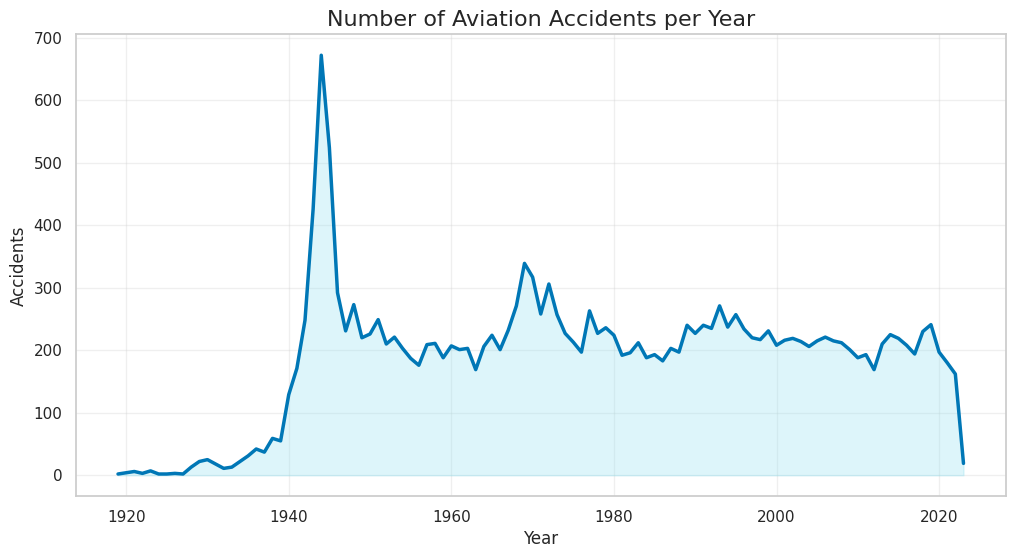

In [10]:
plt.figure(figsize=(12,6))
plt.plot(accidents_per_year, color='#0077b6', linewidth=2.5)  # Blue ocean tone
plt.fill_between(accidents_per_year.index, accidents_per_year, color='#90e0ef', alpha=0.3)
plt.title('Number of Aviation Accidents per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Accidents')
plt.grid(alpha=0.3)
plt.show()


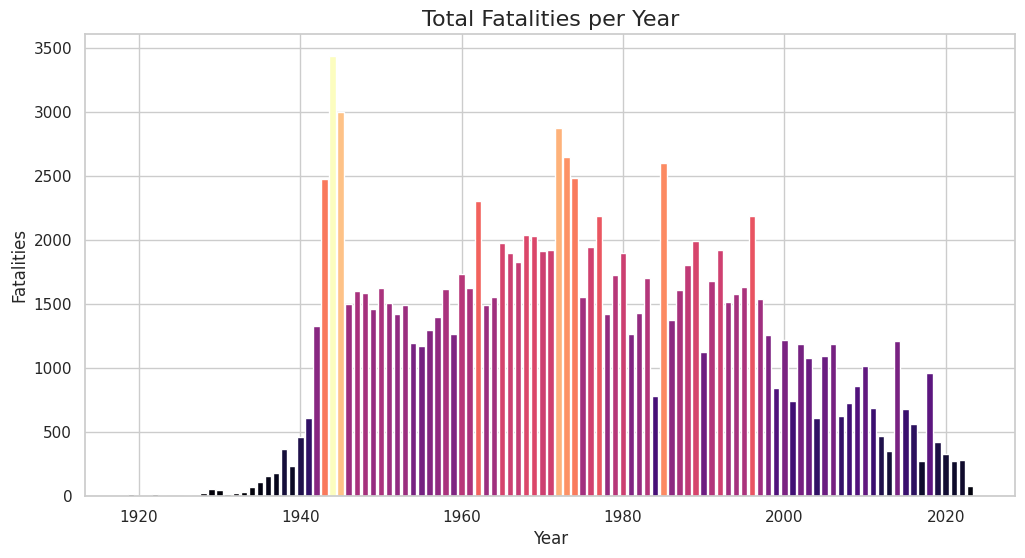

In [12]:


# Convert 'year' to numeric (ignore non-numeric like "unknown")
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# Convert 'fatalities' to numeric as well
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

# Drop rows where year or fatalities are missing
df_clean = df.dropna(subset=['year', 'fatalities'])

# Group data by year
fatalities_per_year = df_clean.groupby('year')['fatalities'].sum()

# Now plot with gradient colors
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.bar(fatalities_per_year.index,
        fatalities_per_year.values,
        color=plt.cm.magma(fatalities_per_year.values / max(fatalities_per_year.values)))

plt.title('Total Fatalities per Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.show()


operator
USAF          929
USAAF         845
RAF           710
US Navy       493
private       280
German AF     266
Aeroflot      183
Unknown       146
Air France    122
Soviet AF     119
Name: count, dtype: int64


/tmp/ipython-input-3199667501.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values,
/tmp/ipython-input-3199667501.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_operators.values, y=top_operators.index, palette=colors)


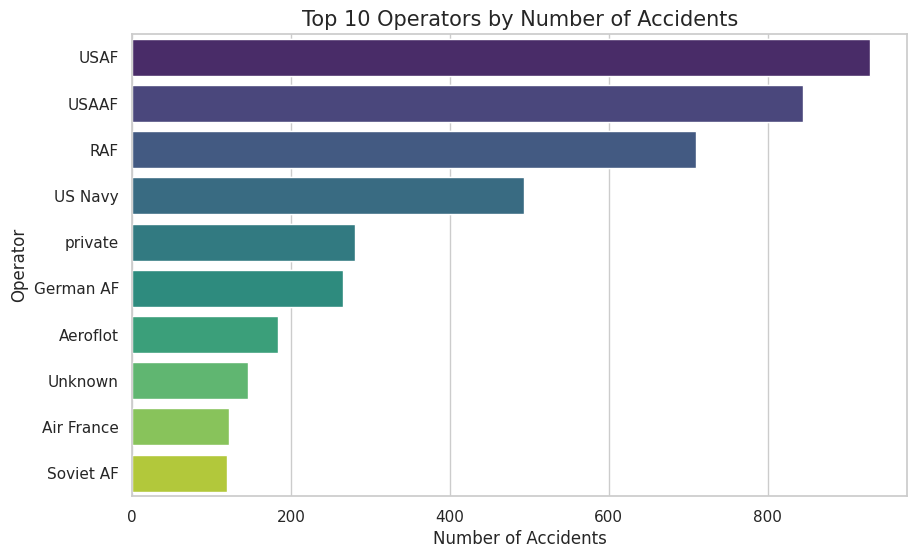

In [15]:
# Count number of accidents by each operator
top_operators = df['operator'].value_counts().head(10)

# Display the result
print(top_operators)


sns.set_style("whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(x=top_operators.values,
            y=top_operators.index,
            palette="crest")

plt.title("Top 10 Operators by Number of Accidents", fontsize=15)
plt.xlabel("Number of Accidents")
plt.ylabel("Operator")



colors = sns.color_palette("viridis", n_colors=10)
sns.barplot(x=top_operators.values, y=top_operators.index, palette=colors)
plt.show()


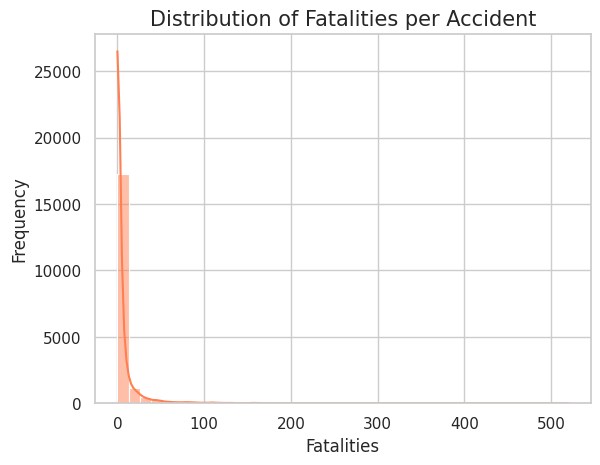

In [16]:
sns.histplot(df['fatalities'], bins=40, color='#ff7f50', kde=True)
plt.title('Distribution of Fatalities per Accident', fontsize=15)
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.show()


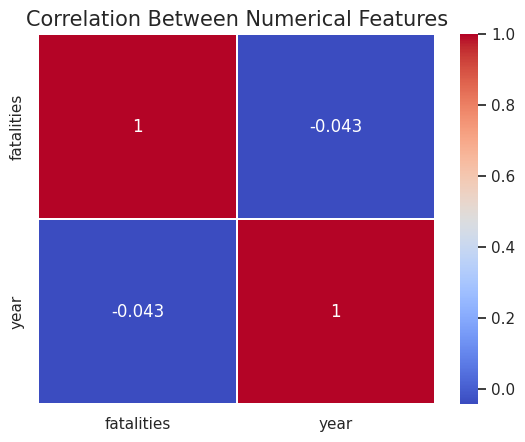

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Between Numerical Features', fontsize=15)
plt.show()


In [19]:
fig = px.scatter_3d(df,
                    x='year',
                    y='fatalities',
                    z='type',
                    color='fatalities',
                    size='fatalities',
                    color_continuous_scale='viridis',
                    title='3D Visualization: Year vs Fatalities vs Aircraft Type')
fig.show()


In [23]:

import plotly.express as px

# Convert to numeric (ignore invalids like "unknown")
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

# Drop rows with missing data
df_clean = df.dropna(subset=['year', 'fatalities'])

# Group by year and sum fatalities
yearly = df_clean.groupby('year', as_index=False)['fatalities'].sum()

# Create an interactive line chart
fig = px.line(yearly,
              x='year',
              y='fatalities',
              markers=True,
              title='Interactive Fatalities Trend (Plotly)',
              color_discrete_sequence=['#ff4d6d'])  # soft red tone
fig.update_traces(line=dict(width=3))
fig.update_layout(template='plotly_white')
fig.show()


In [24]:
mean_fatalities = np.mean(df['fatalities'])
median_fatalities = np.median(df['fatalities'])
std_fatalities = np.std(df['fatalities'])

print(f"Mean Fatalities: {mean_fatalities:.2f}")
print(f"Median Fatalities: {median_fatalities}")
print(f"Standard Deviation: {std_fatalities:.2f}")


Mean Fatalities: 6.17
Median Fatalities: 0.0
Standard Deviation: 18.74
